## Analysing Fuel Voltage Signal Data

In [1]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, freqz
from scipy import signal as sg
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import statsmodels.api as sm
import datetime

%matplotlib inline

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools



### Data Gathering (From First Step Wrangling in F1)
#### Loading data in Pandas Dataframe

In [2]:
df_list = []
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()
df6 = pd.DataFrame()

def loadData():
    global df1,df2,df3,df4,df5,df6
    df1 = pd.read_csv(r"data\Analog\data13.csv")
    df2 = pd.read_csv(r"data\Analog\data14.csv")
    df3 = pd.read_csv(r"data\Analog\data15.csv")
    df4 = pd.read_csv(r"data\Analog\data16.csv")
    df5 = pd.read_csv(r"data\Analog\data17.csv")
    df6 = pd.read_csv(r"data\Analog\data18.csv")
    return 

loadData()
df_list.append(df1)
df_list.append(df2)
df_list.append(df3)
df_list.append(df4)
df_list.append(df5)
df_list.append(df6)
df4.info()

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262623 entries, 0 to 262622
Data columns (total 6 columns):
Unnamed: 0     118071 non-null float64
datetime       262623 non-null object
speed          262623 non-null float64
distance       262623 non-null int64
fuelVoltage    262623 non-null int64
dev_state      262623 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 12.0+ MB


In [3]:
df1.head()

,Unnamed: 0,datetime,speed,distance,fuelVoltage,dev_state
0,0,2017-11-22 04:37:25,0.0,0,7,0
1,1,2017-11-22 04:37:55,0.0,0,7,0
2,2,2017-11-22 04:38:25,0.0,0,7,0
3,3,2017-11-22 04:38:33,0.0,3,7,0
4,4,2017-11-22 04:38:45,0.0,3,7,0


In [4]:
date1 = pd.to_datetime(df1.datetime)
date2 = pd.to_datetime(df2.datetime)
date3 = pd.to_datetime(df3.datetime)
date4 = pd.to_datetime(df4.datetime)
date5 = pd.to_datetime(df5.datetime)
date6 = pd.to_datetime(df6.datetime)

In [5]:
### Sorting w.r.t to time

### Assessing 
#### 1. Checking order of Data, as per datetime

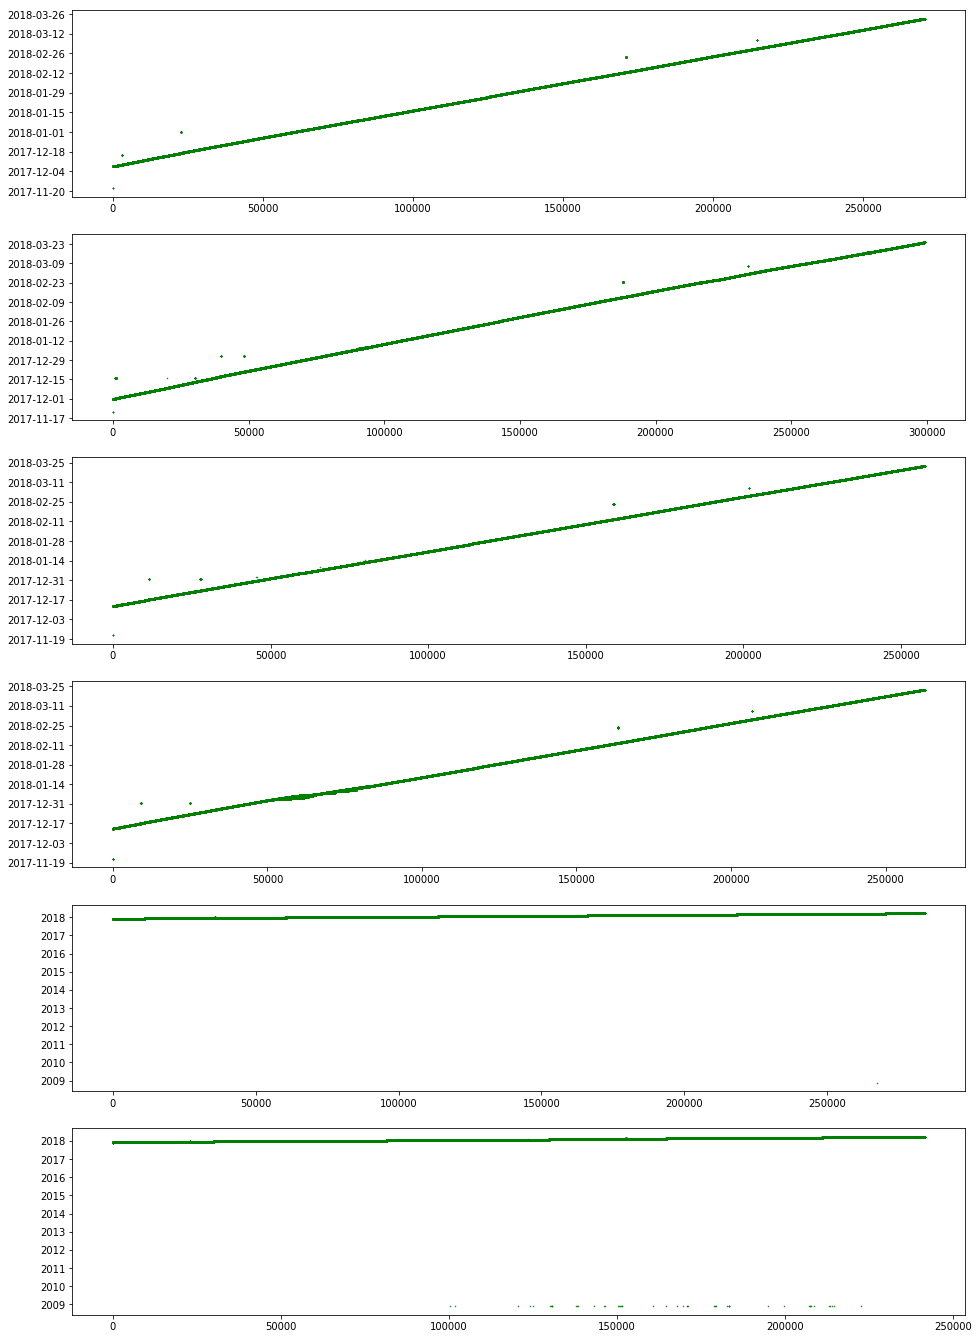

In [6]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.index, date1, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,2)
plt.plot(df2.index, date2, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.index, date3, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.index, date4, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.index, date5, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.index, date6, 'g.', markersize = 1, linewidth = 1);



### Assessing 
#### 2. Plotting Fuel voltage vs Datetime

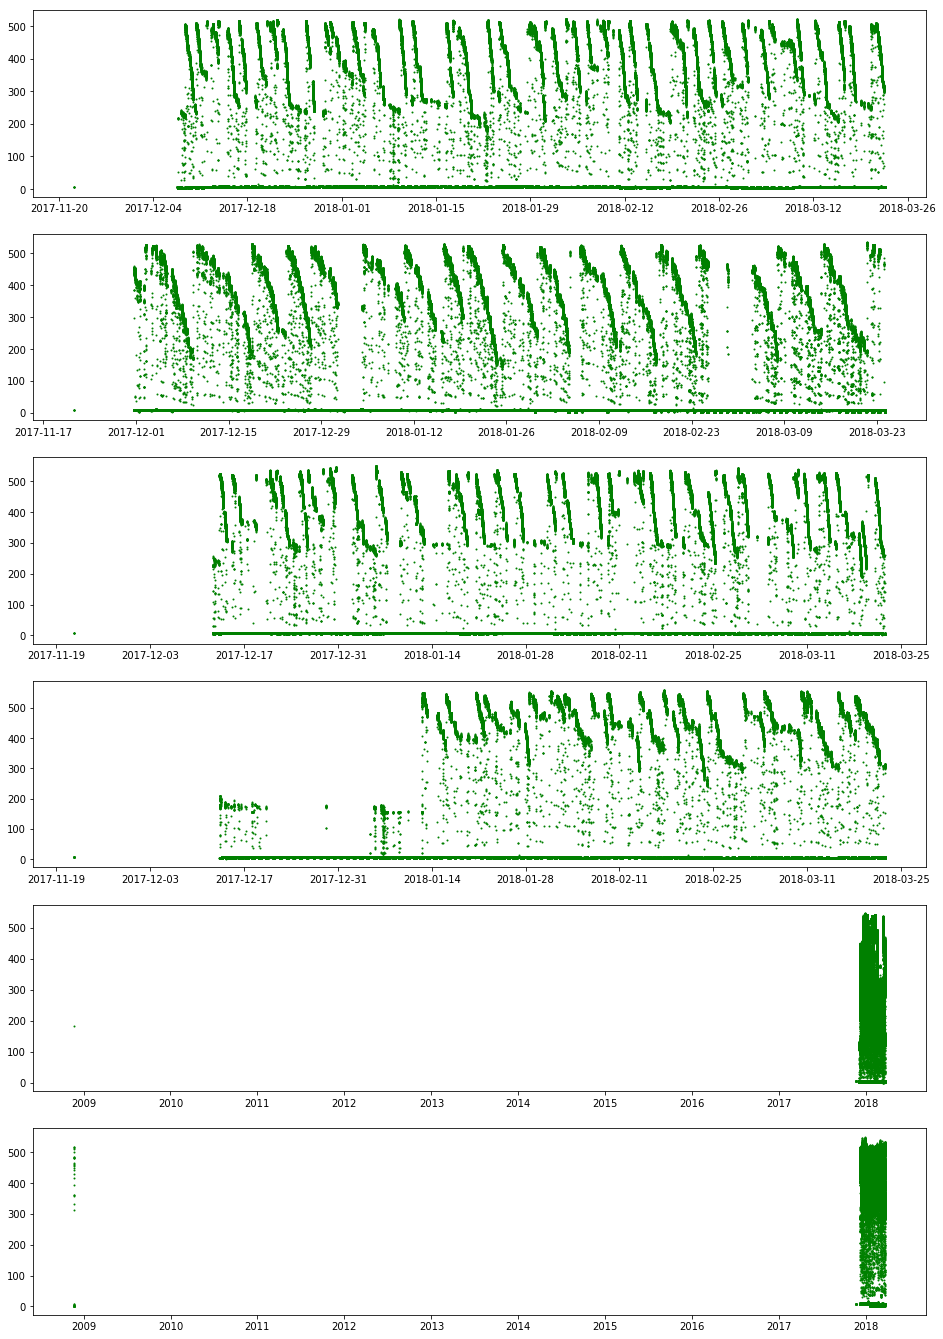

In [7]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(date1, df1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,2)
plt.plot(date2, df2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(date3, df3.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(date4, df4.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(date5, df5.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(date6, df6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);



### Assessing 
#### 3. Plotting Cumulative Distance vs time

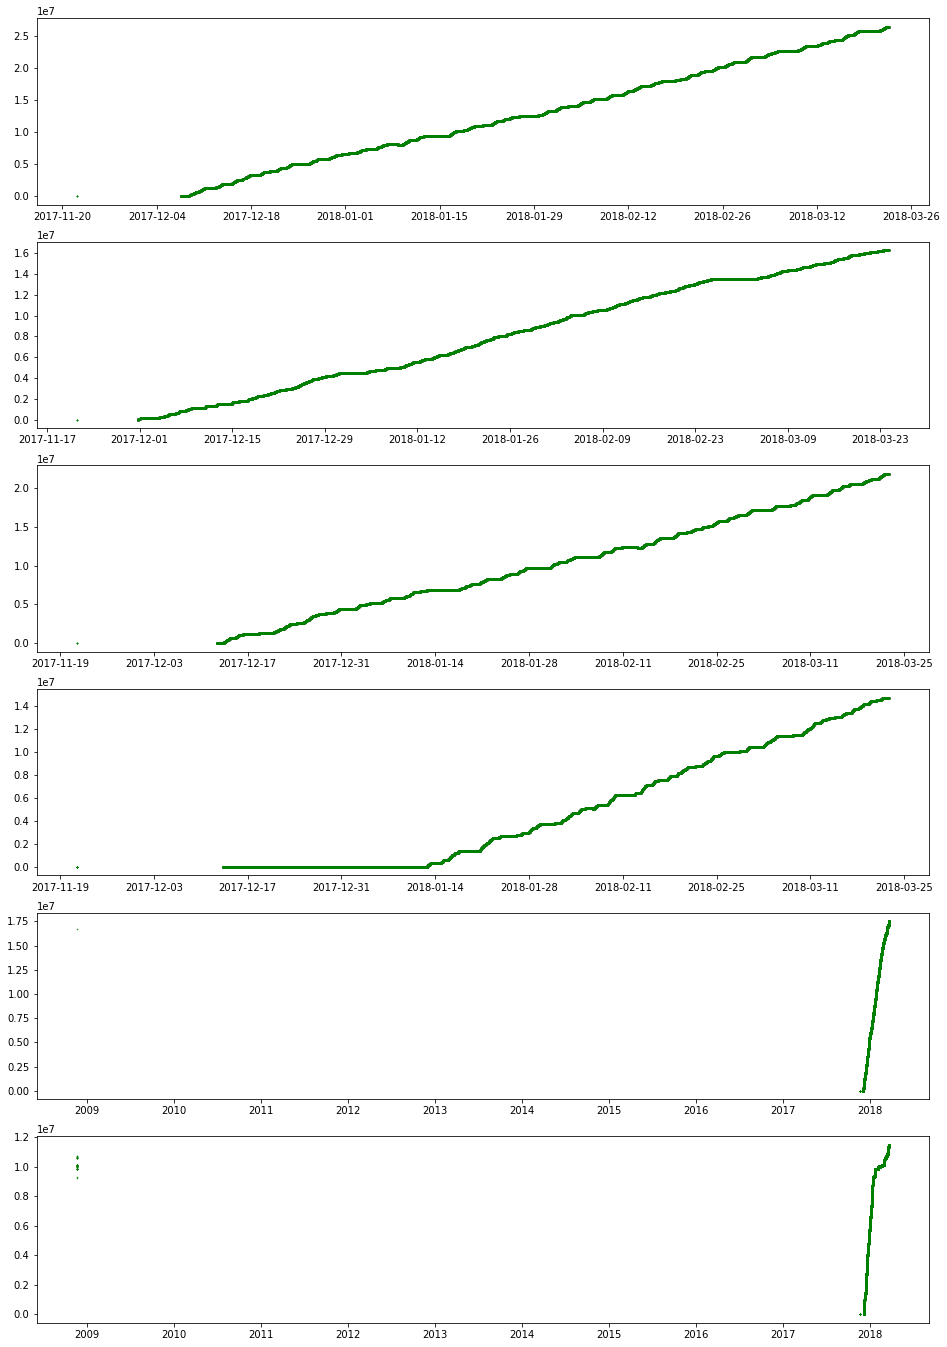

In [8]:
plt.rcParams['figure.figsize'] = [16,24]
ctr = 1
for df in df_list:
    plt.subplot(6,1,ctr)
    plt.plot(pd.to_datetime(df.datetime),df.distance,  'g.', markersize = 1, linewidth = 1);
    ctr +=1




In [9]:
loadData()

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:2856: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


### Data Cleaning

#### 1. Setting Datetime datatype for all datasets, depending upon type of date format written

In [10]:


def formatDate():
    global df1,df2,df3,df4,df5,df6 
    df1.datetime = df1.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
    df2.datetime = df2.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
    df3.datetime = df3.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
    df4.datetime = df4.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
    df5.datetime = df5.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
    df6.datetime = df6.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )

formatDate()



#### 2. Sorting data as per DATETIME

In [11]:
def sortDate():
    global df1,df2,df3,df4,df5,df6 
    df1 = df1.sort_values(['datetime'], ascending= True)
    df2 = df2.sort_values(['datetime'], ascending= True)
    df3 = df3.sort_values(['datetime'], ascending= True)
    df4 = df1.sort_values(['datetime'], ascending= True)
    df5 = df2.sort_values(['datetime'], ascending= True)
    df6 = df3.sort_values(['datetime'], ascending= True)

sortDate()

#### 3. Removing Outliars

In [12]:
def checkDate_outliar(df):
    timeDiff = df.datetime.shift(-1) - df.datetime
    try:
        lastIndex = timeDiff[timeDiff > pd.Timedelta('2 day')].index[-1] 
    except:
        lastIndex = -1
    print(lastIndex)
    return (lastIndex +1)




def removeOutliar():
    global df1,df2,df3,df4,df5,df6
       
    df1 = df1[df1['distance']>=0]
    ## Removing Y-outliars
    df1 = df1[abs(df1.fuelVoltage - df1.fuelVoltage.mean()) < 3*df1.fuelVoltage.std()]
    df1 = df1.reset_index(drop = True)
    ## Removing Date_outliars
    startDate = checkDate_outliar(df1)
    df1 = df1[startDate:]
    
    df2 = df2[df2['distance']>=0]
    ## Removing Y-outliars
    df2 = df2[abs(df2.fuelVoltage - df2.fuelVoltage.mean()) < 3*df2.fuelVoltage.std()]
    df2 = df2.reset_index(drop = True)
    ## Removing Date_outliars
    startDate = checkDate_outliar(df2)
    df2 = df2[startDate:]
    
    df3 = df3[df3['distance']>=0]
    ## Removing Y-outliars
    df3 = df3[abs(df3.fuelVoltage - df3.fuelVoltage.mean()) < 3*df3.fuelVoltage.std()]
    df3 = df3.reset_index(drop = True)
    ## Removing Date_outliars
    startDate = checkDate_outliar(df3)
    df3 = df3[startDate:]
    
    df4 = df4[df4['distance']>=0]
    df4 = df4[abs(df4.fuelVoltage - df4.fuelVoltage.mean()) < 3*df4.fuelVoltage.std()]
    df4 = df4.reset_index(drop = True)
    startDate = checkDate_outliar(df4)
    df4 = df4[startDate:]
    
    df5 = df5[df5['distance']>=0]
    df5 = df5[abs(df5.fuelVoltage - df5.fuelVoltage.mean()) < 3*df5.fuelVoltage.std()]
    df5 = df5.reset_index(drop = True)
    startDate = checkDate_outliar(df5)
    df5 = df5[startDate:]
    
    df6 = df6[df6['distance']>=0]
    df6 = df6[abs(df6.fuelVoltage - df6.fuelVoltage.mean()) < 3*df6.fuelVoltage.std()]
    df6 = df6.reset_index(drop = True)
    
    startDate = checkDate_outliar(df6)
    df6 = df6[startDate:]
    
    
removeOutliar()

4
4
4
4
4
4


In [13]:
a = df5.datetime.shift(-1) - df5.datetime
a[a > pd.Timedelta('2 day')]

Series([], Name: datetime, dtype: timedelta64[ns])

#### 4. Resetting Index

In [14]:
def resetIndex():
    global df1,df2,df3,df4,df5,df6
    df1 = df1.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)
    df3 = df3.reset_index(drop=True)
    df4 = df4.reset_index(drop=True)
    df5 = df5.reset_index(drop=True)
    df6 = df6.reset_index(drop=True)

    
resetIndex()

In [15]:
d1M = df1.distance.max()
d2M = df2.distance.max()
d3M = df3.distance.max()
d4M = df4.distance.max()
d5M = df5.distance.max()
d6M = df6.distance.max()


#### 5. Normalising Data

In [16]:
def normalData():
    global df1,df2,df3,df4,df5,df6
    
    def norm(df):
        df.distance= df.distance/df.distance.max()
        df.fuelVoltage = df.fuelVoltage/df.fuelVoltage.max()
        return df

    df1 = norm(df1)
    df2 = norm(df2)
    df3 = norm(df3)
    df4 = norm(df4)
    df5 = norm(df5)
    df6 = norm(df6)


normalData()

In [17]:
datetime.datetime(2016,5,1).month

5

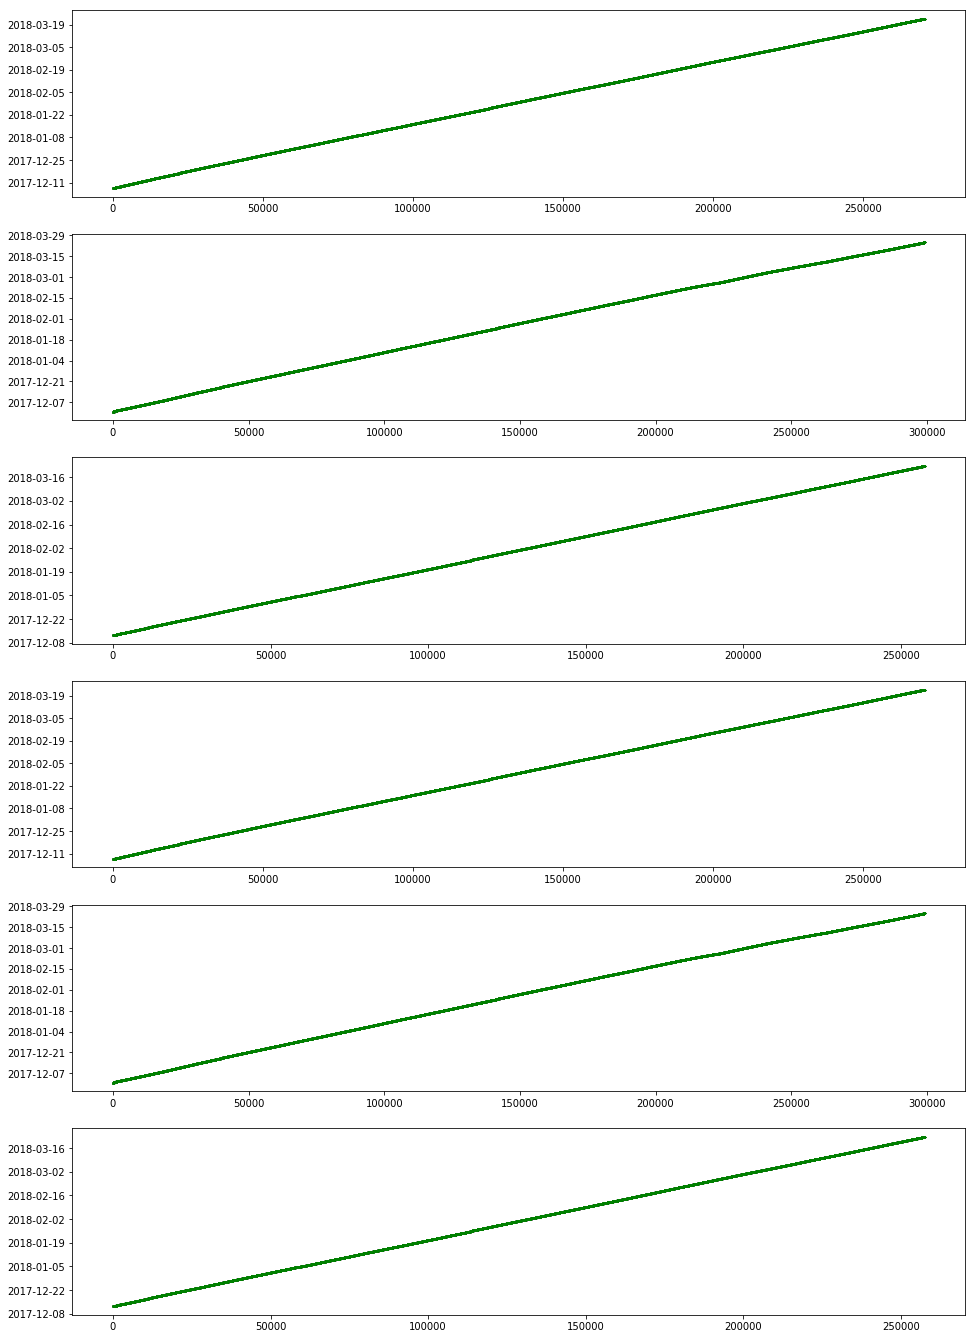

In [18]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.index, df1.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,2)
plt.plot(df2.index, df2.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.index, df3.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.index, df4.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.index, df5.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.index, df6.datetime, 'g.', markersize = 1, linewidth = 1);



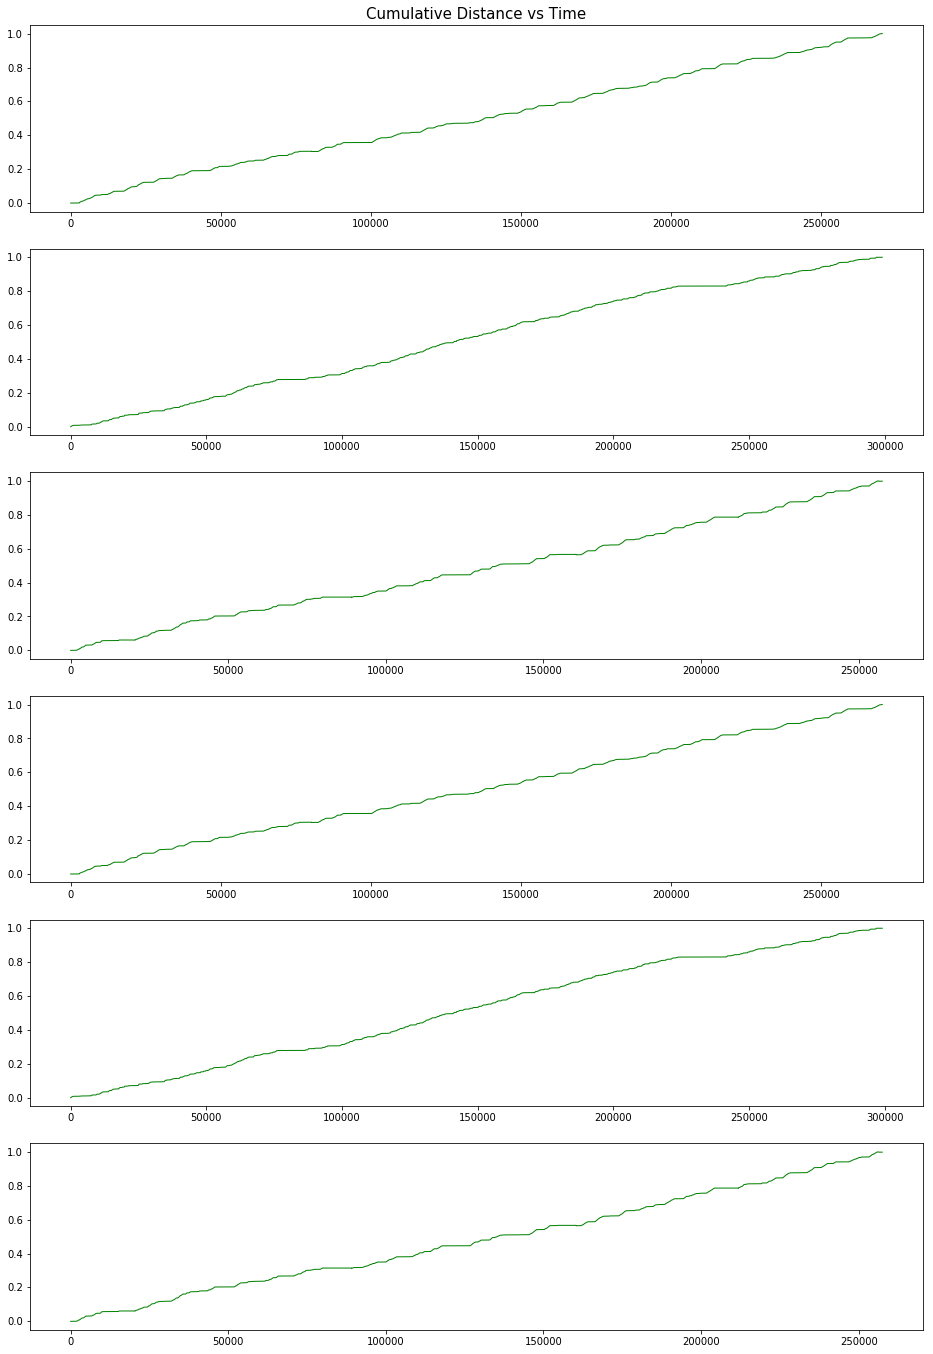

In [19]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.index, df1.distance, 'g-', markersize = 2, linewidth = 1);
plt.title("Cumulative Distance vs Time", fontsize = 15)

plt.subplot(6,1,2)
plt.plot(df2.index, df2.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.index, df3.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.index, df4.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.index, df5.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.index, df6.distance, 'g-', markersize = 2, linewidth = 1);


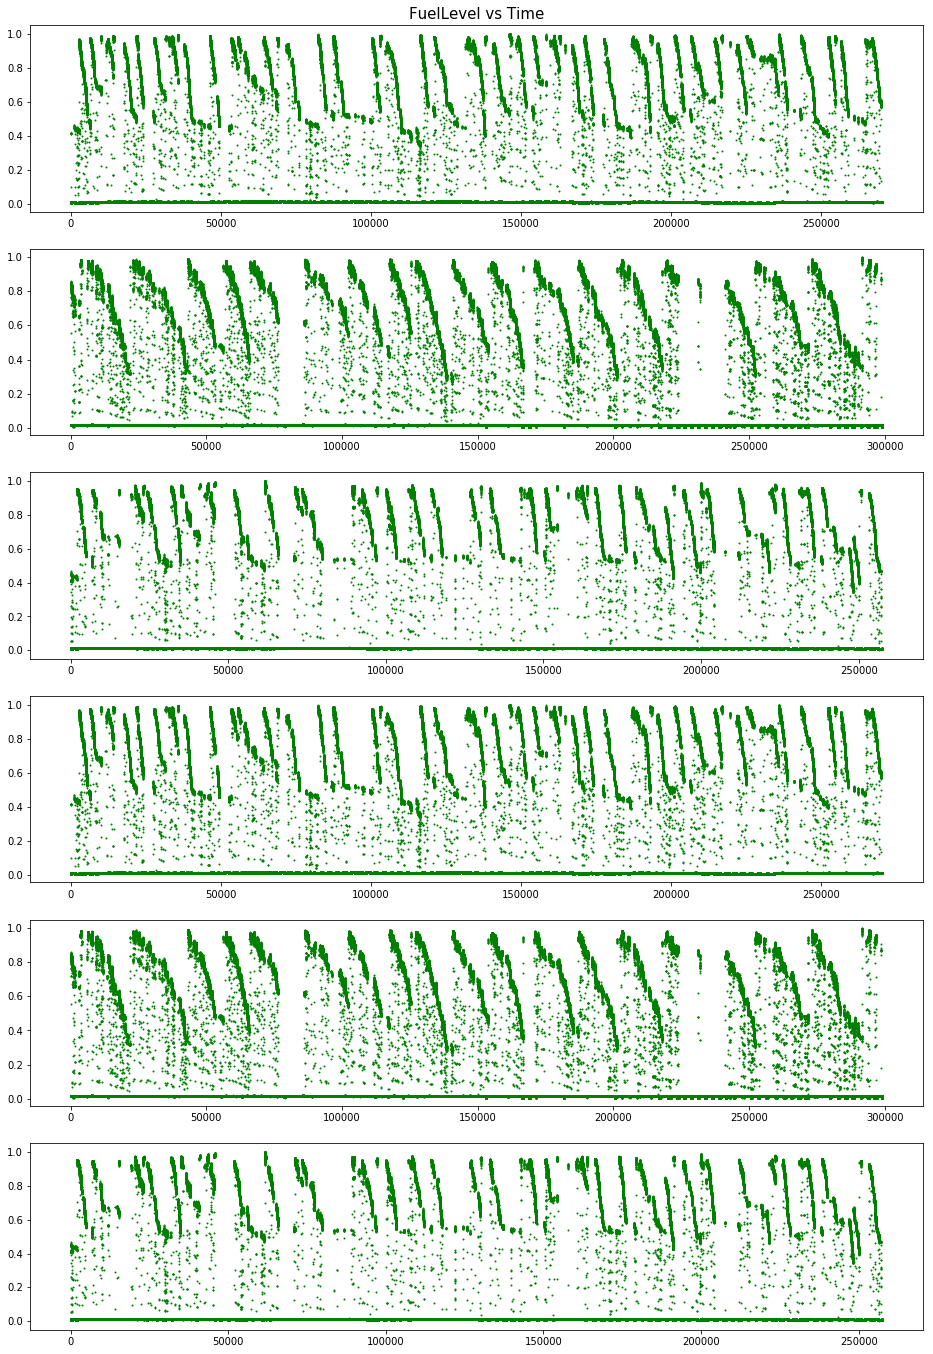

In [20]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.index, df1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.title("FuelLevel vs Time", fontsize = 15)
# plt.ylim(0.90,1.01)
# plt.xlim(0,80000)

plt.subplot(6,1,2)
plt.plot(df2.index, df2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.index, df3.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.index, df4.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.index, df5.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.index, df6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.savefig("Conti/Level1.png")


### Removing 'device_state' = OFF rows

In [21]:
df1['dev_state'] = df1['dev_state'].apply(lambda x: int(x))
df2['dev_state'] = df2['dev_state'].apply(lambda x: int(x))
df3['dev_state'] = df3['dev_state'].apply(lambda x: int(x))
df4['dev_state'] = df4['dev_state'].apply(lambda x: int(x))
df5['dev_state'] = df5['dev_state'].apply(lambda x: int(x))
df6['dev_state'] = df6['dev_state'].apply(lambda x: int(x))

       
dff1 = df1[df1['dev_state'] ==1]
dff2 = df2[df2['dev_state'] ==1]
dff3 = df3[df3['dev_state'] ==1]
dff4 = df4[df4['dev_state'] ==1]
dff5 = df5[df5['dev_state'] ==1]
dff6 = df6[df6['dev_state'] ==1]


In [22]:
dff1.head()
dff1 = dff1.reset_index(drop=True)
dff2 = dff2.reset_index(drop=True)
dff3 = dff3.reset_index(drop=True)
dff4 = dff4.reset_index(drop=True)
dff5 = dff5.reset_index(drop=True)
dff6 = dff6.reset_index(drop=True)


### Plotting ON State Data

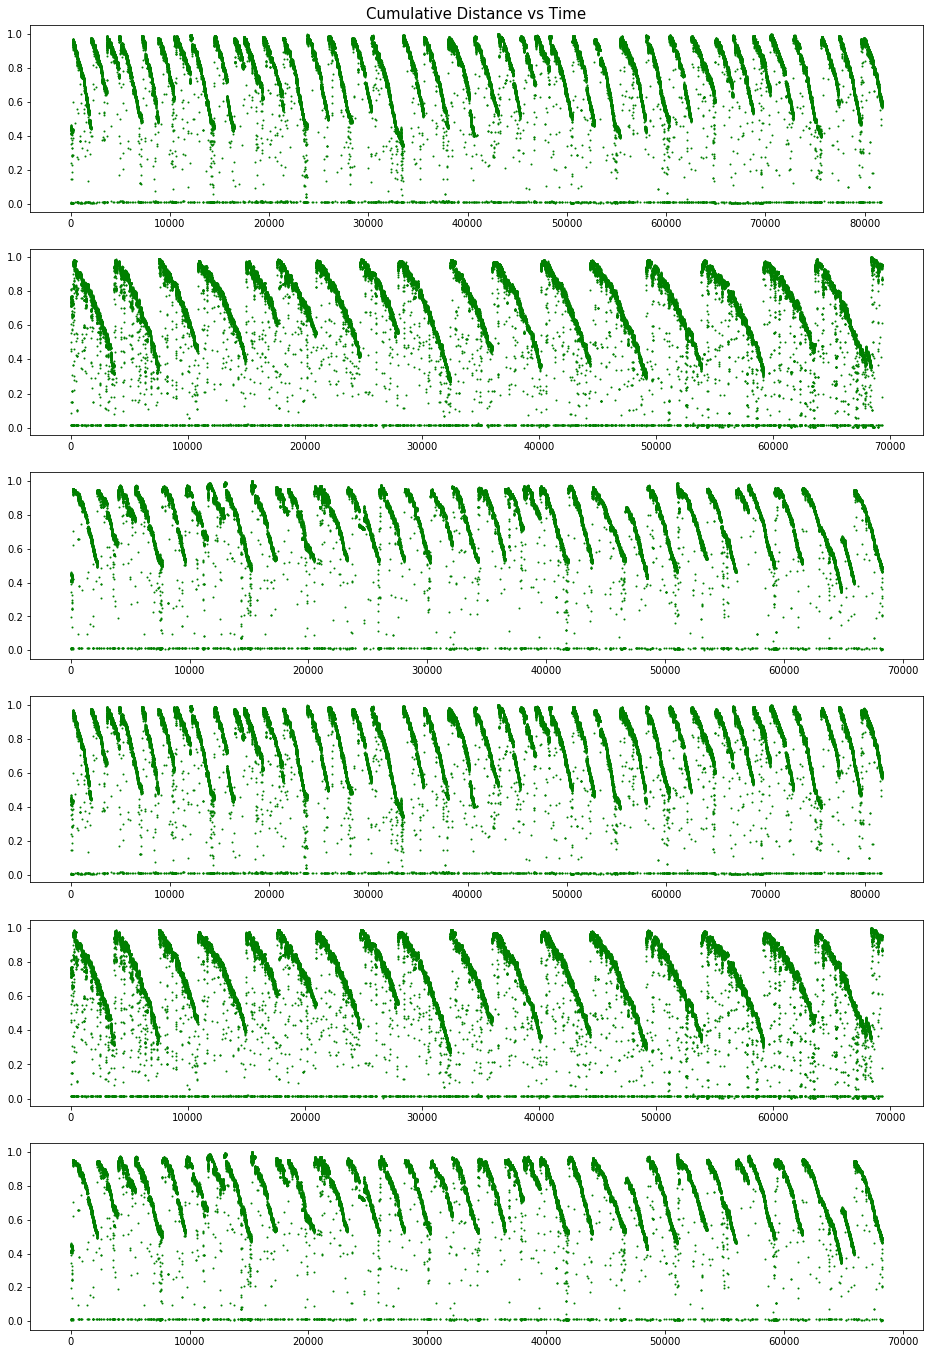

In [23]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.title("Cumulative Distance vs Time", fontsize = 15)

plt.subplot(6,1,2)
plt.plot(dff2.index, dff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(dff3.index, dff3.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(dff4.index, dff4.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(dff5.index, dff5.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(dff6.index, dff6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Level2.2.png')


In [24]:
dff1.fuelVoltage.max(),dff2.fuelVoltage.max(),dff3.fuelVoltage.max(),dff4.fuelVoltage.max(),dff5.fuelVoltage.max(),dff6.fuelVoltage.max()

(1.0, 0.9981308411214953, 1.0, 1.0, 0.9981308411214953, 1.0)

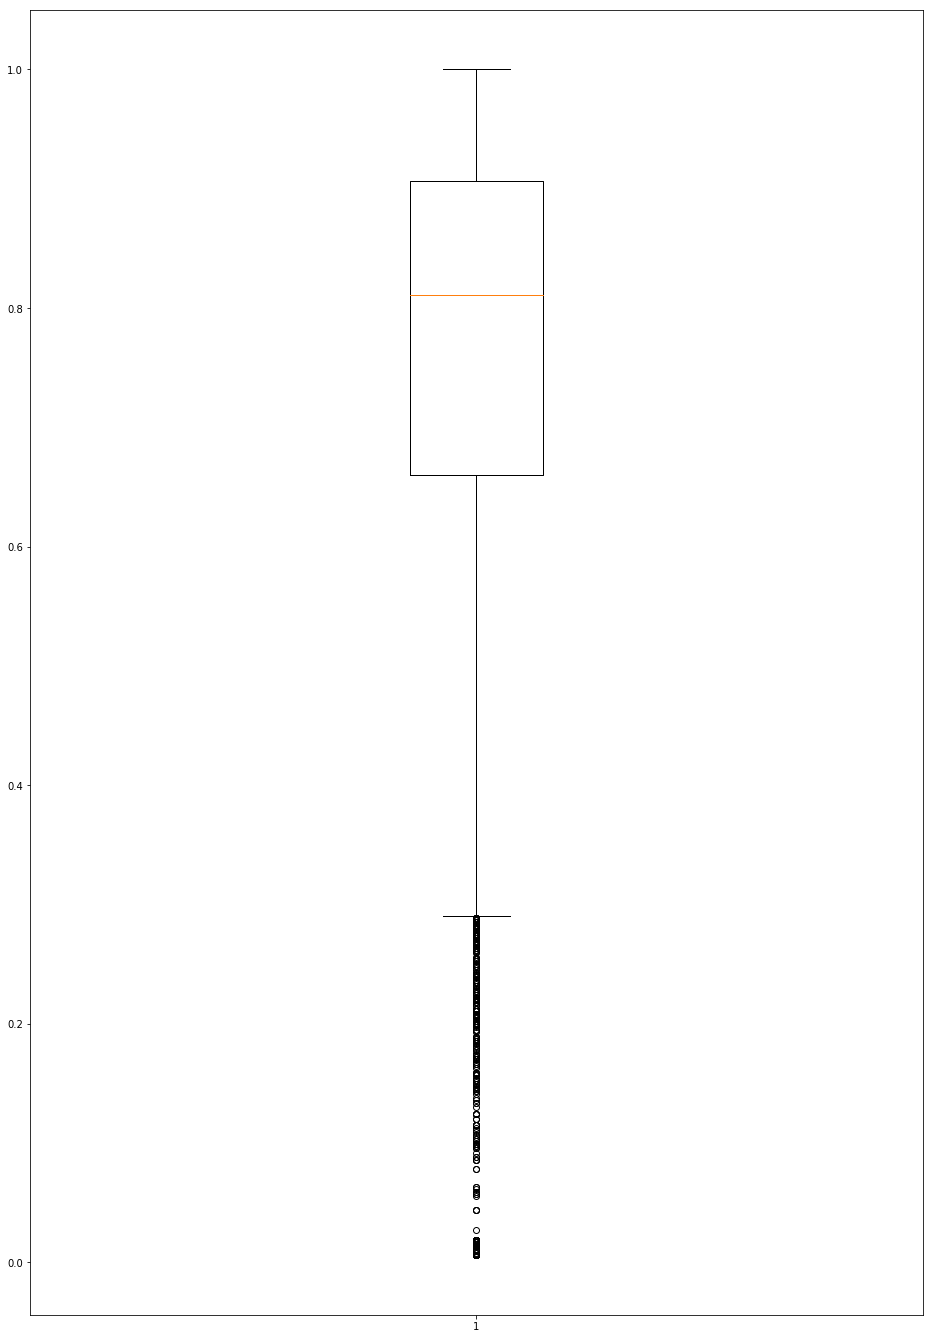

In [25]:
a = dff1['fuelVoltage']
a = pd.value_counts(dff1['fuelVoltage'].values, sort=True)

b = np.array([dff1[dff1.fuelVoltage == value].index.tolist() for value in a])
plt.boxplot(dff1.fuelVoltage);

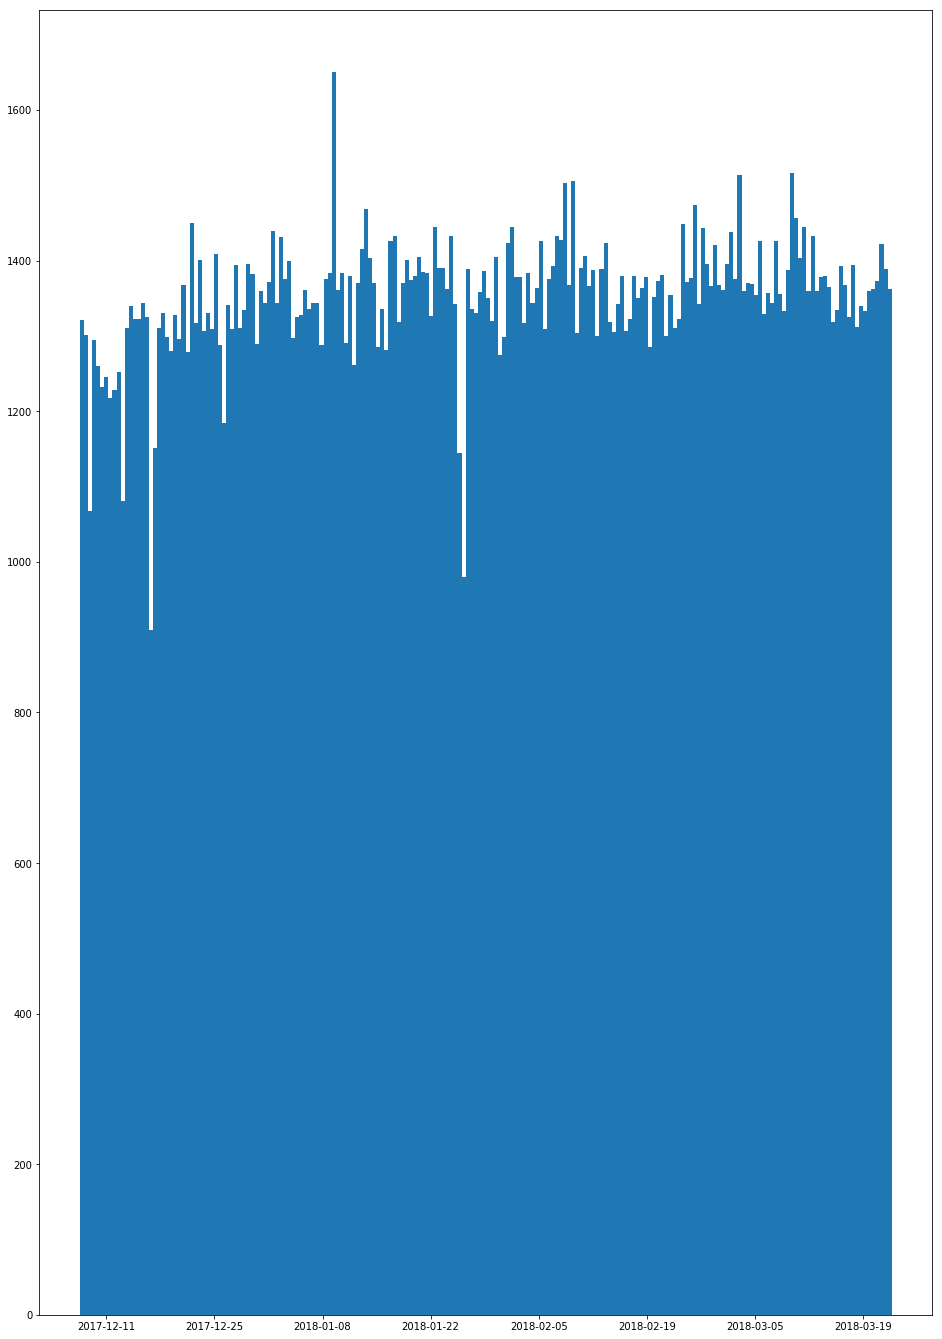

In [26]:
plt.hist(df1.datetime, bins=200);

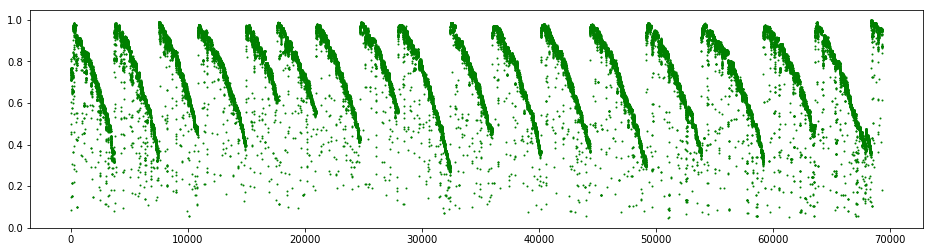

In [27]:
dff2 = dff5.copy()
sd = dff2.fuelVoltage.std()
dfff2 = dff2[abs(dff2.fuelVoltage - dff2.fuelVoltage.mean()) < 3*dff2.fuelVoltage.std()]
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(dfff2.index,dfff2.fuelVoltage,'g.',markersize = 2);
#plt.ylim(0,600)


In [28]:
len(dfff2)/len(dff2)

0.9641240086517664

In [29]:
sd

0.2247264392624342

In [30]:
dff1.fuelVoltage.mean()

0.7634693445517915

In [31]:
len(dff1)

81785

### Removing probable errorenous data  and Plotting

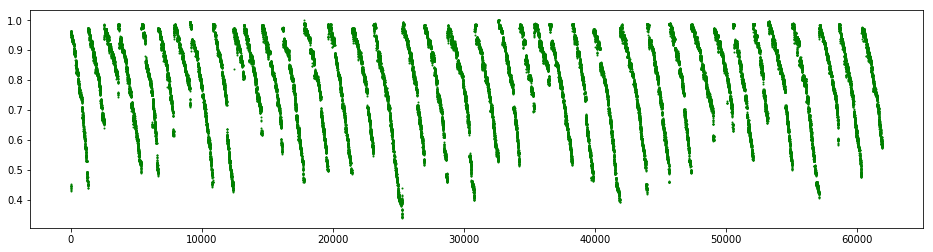

In [39]:
def rem_ErrData(dff, nd, f = ''):   
    x = np.array(dff.index)
    y = np.array(dff.fuelVoltage)

    from sympy.geometry import Point
    i = 0
    dd00000 = [0, 0, 0, 0, 0, 0]
    dd0000 = [0, 0, 0, 0, 0]
    dd000 = [0, 0, 0, 0]
    dd00 = [0, 0, 0]
    dd0 = [0, 0]
    dd1 = [0]

    dd2 = [y[1] - y[0]]
    dd3 = [y[2] - y[0]]
    dd4 = [y[3] - y[0]]
    dd5 = [y[4] - y[0]]
    dd6 = [y[5] - y[0]]
    dd7 = [y[6] - y[0]]

    for i in range(1, len(x)):
        try:
            d00000 = abs(y[i] - y[i - 6])
            d0000 = abs(y[i] - y[i - 5])
            d000 = abs(y[i] - y[i - 4])
            d00 = abs(y[i] - y[i - 3])
            d0 = abs(y[i] - y[i - 2])
            d1 = abs(y[i] - y[i - 1])
            d2 = abs(y[i + 1] - y[i])
            d3 = abs(y[i + 2] - y[i])
            d4 = abs(y[i + 3] - y[i])
            d5 = abs(y[i + 4] - y[i])
            d6 = abs(y[i + 5] - y[i])
            d7 = abs(y[i + 6] - y[i])
        except:
            continue

        dd00000.append(d00000)
        dd0000.append(d0000)
        dd000.append(d000)
        dd00.append(d00)
        dd0.append(d0)
        dd1.append(d1)
        dd2.append(d2)
        dd3.append(d3)
        dd4.append(d4)
        dd5.append(d5)
        dd6.append(d6)
        dd7.append(d7)

        # print (i)

        # dd1.append(0)
        # dd2.append(0)
    dff['dd00000'] = pd.Series(dd00000)
    dff['dd0000'] = pd.Series(dd0000)
    dff['dd000'] = pd.Series(dd000)
    dff['dd00'] = pd.Series(dd00)
    dff['dd0'] = pd.Series(dd0)
    dff['dd1'] = pd.Series(dd1)
    dff['dd2'] = pd.Series(dd2)
    dff['dd3'] = pd.Series(dd3)
    dff['dd4'] = pd.Series(dd4)
    dff['dd5'] = pd.Series(dd5)
    dff['dd6'] = pd.Series(dd6)
    dff['dd7'] = pd.Series(dd7)

    p = dff['dd1']
    ## Removing Error Data
    
    
    dff1 = dff[(dff.dd1 <= nd) & (dff.dd2 <= nd) & (dff.dd0 <= 2*nd) & (dff.dd3 <= 2*nd) &
           (dff.dd00 <= 3*nd) & (dff.dd4 <=3*nd) & (dff.dd000 <= 4*nd) & (dff.dd5 <= 4*nd) &
           (dff.dd0000 <= 5*nd) & (dff.dd6 <= 5*nd) & (dff.dd00000 <= 6*nd) & (dff.dd7 <= 6*nd)]
    dff1 = dff1.reset_index(drop=True)  ## Reseting index

#     plt.rcParams['figure.figsize'] = [16, 4]
#     plt.plot(p, 'b.')
#     plt.title('Histogram - Consecutive Fuel Difference ', fontsize=15)
#     plt.ylim(0, 0.05)
    #
    # #     plt.ylim(0.02,1)
    # #     plt.savefig("test.png")
    plt.rcParams['figure.figsize'] = [16, 4]
    plt.plot(dff1.index[:], dff1.fuelVoltage[:], 'g.', markersize=2, linewidth=1);
    #plt.ylim(0.95, 1)
    #plt.xlim(0,50000)
   
    return dff1

df1l6 =rem_ErrData(dff1, nd = 0.02);

In [38]:
def rem_ErrData2(dff, nd = 0.02): 
    global distDf
    x = np.array(dff.index)
    y = np.array(dff.fuelVoltage)

    dback_arr =[]
    dforward_arr = []

    for i in range(len(x)):
        try:
            dback = abs(y[i-5:i+1] - y[i-6:i])
            dforward = abs(y[i:i+6] - y[i+1:i+7])
            #print(dforward)
            #print((dback))
            
        except:
            print("***")
            dback = np.array([0,0,0,0,0,0])
            dforward = np.array([0,0,0,0,0,0])
        
        if len(dback)==0:
            dback = np.array([0,0,0,0,0,0])
            
        if len(dforward)==0:
            dforward = np.array([0,0,0,0,0,0])
            
        dback_arr.append(dback)
        dforward_arr.append(dforward)
    
    print(len(dff))
    print(len(dback_arr))
    distDf = pd.DataFrame()
    distDf['dback'] = pd.Series(dback_arr)
    distDf['dforward'] = pd.Series(dforward_arr)
    distDf.index = dff.index

    ## Removing Error Data
    print(distDf.dback[47])
    distDf = distDf[(sum(distDf.dback <= 0.02) == 6) and (sum(distDf.dforward <= 0.02) == 6)]
    dff1 = dff1[distDf.index]
    dff1 = dff1.reset_index(drop=True)  ## Reseting index

#     plt.rcParams['figure.figsize'] = [16, 4]
#     plt.plot(p, 'b.')
#     plt.title('Histogram - Consecutive Fuel Difference ', fontsize=15)
#     plt.ylim(0, 0.05)
    #
    # #     plt.ylim(0.02,1)
    # #     plt.savefig("test.png")
    plt.rcParams['figure.figsize'] = [16, 4]
    plt.plot(dff1.index[:], dff1.fuelVoltage[:], 'g.', markersize=2, linewidth=1);
    plt.ylim(0, 1.1)
   
    return dff1

df1l6 =rem_ErrData2(dff1,0.02);


***
***
***
***
***
81785
81785
[0.00956023 0.42638623 0.34799235 0.08221797 0.00191205 0.00191205]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
dis

In [ ]:
a = pd.Series([1,2,3,4])
b = pd.Series([1,2,3,4])

a-b

In [ ]:
a.append(pd.Series([5,6,2]))

In [ ]:
a

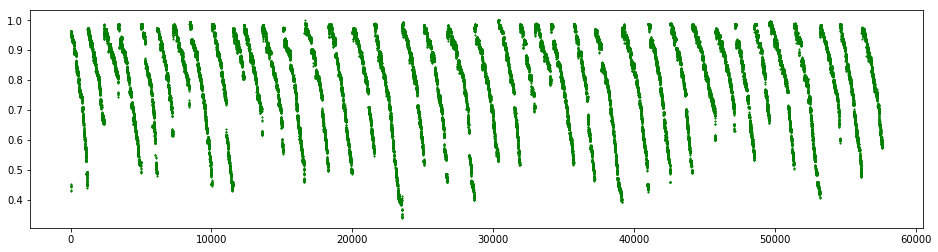

In [48]:
plt.rcParams['figure.figsize'] = [16,4]
df1l6 =rem_ErrData(dff1,0.01);
plt.plot(df1l6.index, df1l6.fuelVoltage,'g.', markersize = 1)
#plt.ylim(0,1.05)

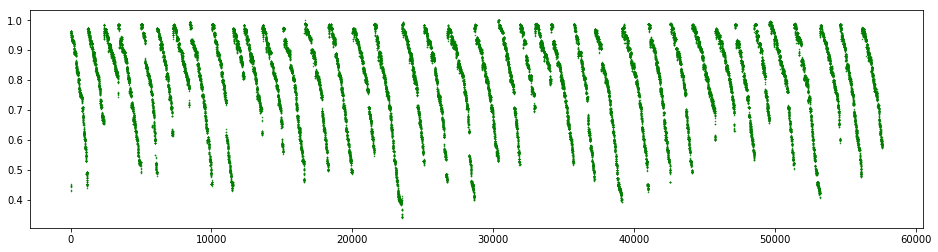

In [49]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(df1l6.index, df1l6.fuelVoltage,'g.', markersize = 1)
#plt.ylim(0,1.05)
#plt.xlim(19000,21500)

In [ ]:
plt.hist(df1l6.dd1)
#plt.ylim(0,10000)

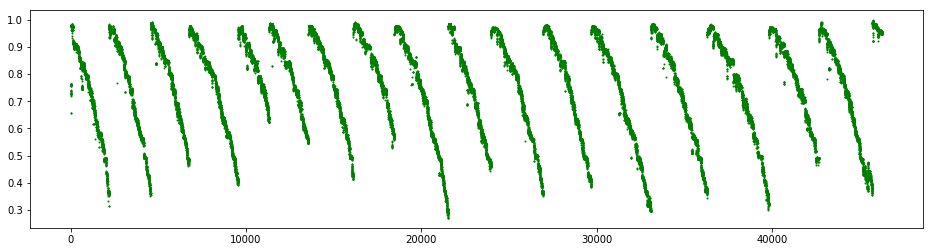

In [50]:
df2l6 = rem_ErrData(dff2,nd=0.02);

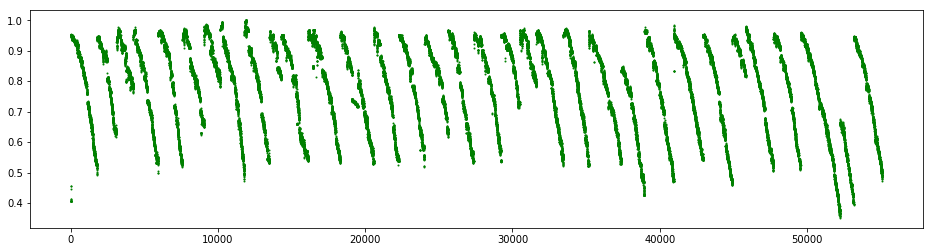

In [51]:
df3l6 = rem_ErrData(dff3,nd=0.02);

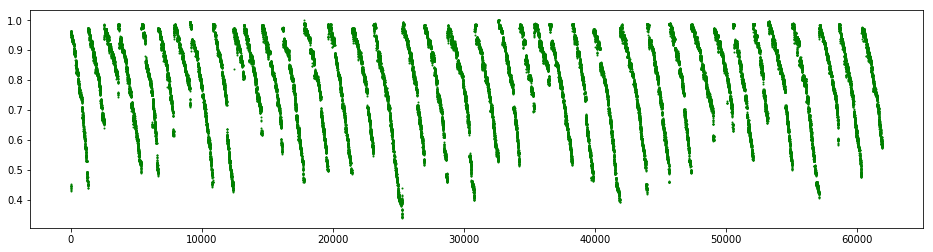

In [52]:
df4l6 = rem_ErrData(dff4,nd=0.02);


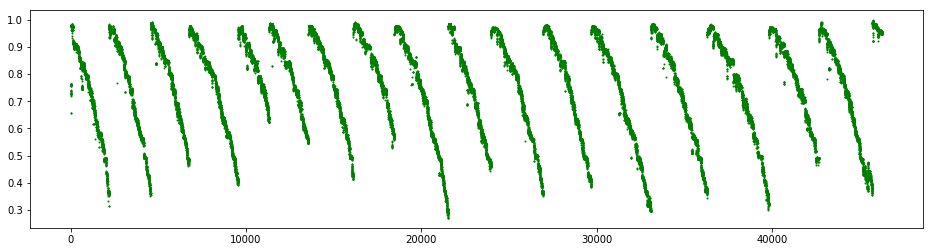

In [53]:
df5l6 = rem_ErrData(dff5,nd=0.02);

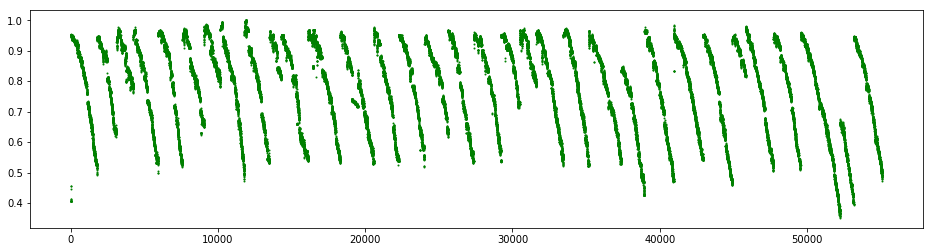

In [54]:
df6l6 = rem_ErrData(dff6,nd=0.02);

In [ ]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1l6.index, df1l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.title("CleanedFuel data vs Time", fontsize = 15)

plt.subplot(6,1,2)
plt.plot(df2l6.index, df2l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3l6.index, df3l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4l6.index, df4l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5l6.index, df5l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6l6.index, df6l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Level3.png')

In [ ]:
a = pd.Series([2,3,4,5,6])
a1 = a[[1,2]] 
a2 = a[[1,3]]
a1 = a1.reset_index(drop=True)
a2 = a2.reset_index(drop=True)
a1-a2

In [ ]:
df1.distance.max()

### Identifying probable datajump points

In [ ]:
##########################################################3
## Modified function for finding fuel-jump points

def jump_point2(dff, level = 0.05, fuelMax=100, fuelMin=0):
    x = np.array(dff.index)
    y = np.array(dff.fuelVoltage)
    d = np.array(dff.distance)
    
    level = level*(fuelMax - fuelMin)
    theft_pts = []
    refpts = []
    rctr = 0
    ctr = 0
    i = 0
    dd1 = [0]
    disback = []
    disfor = []

    dd2 = [y[1] - y[0]]
    for i in range(1, len(x)):
        try:
            #             d1 =abs(y[i+1] - y[i])
            #             d2 =abs(y[i+2] - y[i])
            d_forward = (y[i + 1:i + 20] - y[i])
            d_backward = (y[i + 1] - y[i - 20:i])
            disfor.append(d[i + 20] - d[i])
            disback.append(d[i] - d[i-20])
            # print (d_backward)
            
        except:
            print("**")
        # dd1.append(d1)
        # dd2.append(d2)
        # if (d1 >= 0.05) & (d2 >= 0.05)&(d3 >= 0.05)&(d4 >= 0.05)&(d5 >= 0.05)&(d5 >= 0.05):

        ###########################################################################
        #### Finding probable refueling Points
        if ((sum(d_forward > 1 * 3 * level) in list(range(14, 16)))):  # & (sum(d_forward<0.1) == 19)):
            if (sum(d_backward > 1 * 3 * level) in list(range(14, 16))):
                refpts.append(dff.index[i])
                rctr += 1

        ############################################################################
        #### Finding probable theft points
        if ((sum(d_forward < -1 * level) in list(range(19, 21)))):  # & (sum(d_forward<0.1) == 19)):
            if (sum(d_backward < -1 * level) in list(range(19, 21))):
                theft_pts.append(dff.index[i])
                ctr += 1
                # print(theft_pts, ctr)

        if (ctr >= 2):
            if ((theft_pts[ctr - 1] - theft_pts[ctr - 2]) in list(range(1, 6))):
                theft_pts.pop(ctr - 2)
                ctr -= 1
                # print (i)

                # dd1.append(0)
                # dd2.append(0)
    # dff['dd1'] = pd.Series(dd1)
    # dff['dd2'] = pd.Series(dd2)
    print(len(theft_pts))
    return theft_pts, refpts, disback, disfor
    

In [ ]:
a = pd.Series([2,3,4,5])
2-a

In [ ]:
theftpts1 = theft_point2(df1l6, level=0.01);
#dfl4.to_csv("Test.csv");


In [ ]:
len(df1l6.datetime[theftpts1])

### Plotting Cleaned Data with Cumulative Distance (Normalised)

In [ ]:
plt.rcParams['figure.figsize'] = [16,8]
plt.subplot(2,1,1)
plt.plot(df1l6.index, df1l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
#plt.xlim(1500,3000)

plt.subplot(2,1,2)
plt.plot(df1l6.index, df1l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.plot(df1l6.index, df1l6.distance, 'b-', markersize = 2, linewidth = 1);
#plt.ylim(0.8,1)
plt.xlim(3000,6500)
plt.ylim(0.6,1)
for pt in theftpts1:
    plt.axvline(pt)

In [ ]:
df1l6[['fuelVoltage', 'distance','datetime']][28980:29050]

In [ ]:
theftpts2 = theft_point2(df2l6[:], level = 0.01);

In [ ]:
df2l6 =  rem_ErrData(dff2,nd=0.02)

In [ ]:
plt.rcParams['figure.figsize'] = [16,8]
plt.subplot(2,1,1)
plt.plot(df2l6.index, df2l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(2,1,2)
plt.plot(df2l6.index, df2l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.plot(df2l6.index, df2l6.distance, 'b-', markersize = 2, linewidth = 1);
plt.xlim(4800,5400)
plt.ylim(0.7,1)
for pt in theftpts2:
    plt.axvline(pt)

In [ ]:
theftpts3 = theft_point2(df3l6[:], level=0.01);

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df3l6.index, df3l6.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(df3l6.index, df3l6.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(0,3600)
for pt in theftpts3:
    plt.axvline(pt)

In [ ]:
theftpts4 = theft_point2(df4l6[:], 0.02);

In [ ]:
theftpts5 = theft_point2(df5l6[:], 0.01);

In [ ]:
theftpts6 = theft_point2(df6l6[:], 0.01);

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df4l6.index, df4l6.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(df4l6.index, df4l6.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(21000,28000)
for pt in theftpts4:
    plt.axvline(pt)

In [ ]:
result_df1= pd.DataFrame()
result_df1['theft_index'] = [df1l6.index[i] for i in theftpts1]
result_df1['theft_time'] = [df1l6.datetime[i] for i in theftpts1]
result_df1['fuel_jump'] = [(df1l6.fuelVoltage[i] - df1l6.fuelVoltage[i+1])*500 for i in theftpts1]
result_df1['dist_jump(KM)'] = [(df1l6.distance[i+1] - df1l6.distance[i])*(.001)*d1M for i in theftpts1]
result_df1['time_jump'] = [(df1l6.datetime[i+1] - df1l6.datetime[i]) for i in theftpts1]

result_df1

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df5l6.index, df5l6.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(df5l6.index, df5l6.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(10000,11000)
plt.ylim(0.7,1)
for pt in theftpts5:
    plt.axvline(pt)

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df6l6.index, df6l6.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(df6l6.index, df6l6.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(28000,28075)
plt.ylim(0.4,0.6)
for pt in theftpts6:
    plt.axvline(pt)

### Predicting Missing Values 
##### Predicting missing data in the final cleaned data when compared to initial fuel dataset 

In [ ]:

def predit_MissingData(df_old, df_cleaned):
    j=0
    predict_Data = []
    lastdata_value = 0
    i=0
    lastdata_value =  df_old.loc[0,'fuelVoltage']
    
    while i <(len(df_old)):
        
        if j< len(df_cleaned):
            
            if (df_cleaned.loc[j,'datetime'] > df_old.loc[i,'datetime']):
                predict_Data.append(lastdata_value)
                #print ('i = ',i)

            elif (df_cleaned.loc[j,'datetime']== df_old.loc[i,'datetime']):
                lastdata_value =  df_old.loc[i,'fuelVoltage']
                j+=1
                predict_Data.append(lastdata_value)
                #print ('*j = ',j)
        
        else:
            predict_Data.append(df_old.loc[i,'fuelVoltage'])
            #print (i)
            
        i+=1
    
    return predict_Data



predict_Data = predit_MissingData(dff1, df1l6)  
         
        
        

In [ ]:
len(predict_Data), len(dff1), len(df1l6)

### FInding dF/dS

In [ ]:
def feulRate(df):
    fuelRate = []
    for i in range(len(df)):
        try:
            dFuel = abs(df.loc[i+2,'fuelVoltage'] - df.loc[i,'fuelVoltage'])
            dS  = abs(df.loc[i+2,'distance'] - df.loc[i,'distance'])
            rate = dFuel/dS
            fuelRate.append(rate)
        except:
            fuelRate.append(0)
        #print (i, rate)
        
    return fuelRate


In [ ]:
frate = pd.Series(feulRate(df1l6))
len(frate), len(df1l6)

In [ ]:
plt.plot(frate.index, frate, 'b-')
#plt.ylim(0,20000)

In [ ]:
plt.plot

In [ ]:
frate2 = pd.Series(feulRate(dff1))
len(frate2), len(dff1)

In [ ]:
frate = frate[frate>100000]
plt.plot(frate.index, frate, 'b.')
# for pt in theftpts1:
#     plt.axvline(pt, color = 'black')
# #plt.ylim(0,50000)

In [ ]:
len(frate),len(theftpts1)

In [ ]:
frate

In [ ]:
plt.hist(feulRate, bins=100)

### Final Plot
Plotting Original Data, CLeaned Data, Cleaned Data with Prediction,  CLeaned Data (Excluding Zero and Static Zone)

In [ ]:
plt.rcParams['figure.figsize'] = [16,16]

plt.subplot(4,1,1)
plt.plot(df1.datetime, df1.fuelVoltage, 'g.', markersize = 3, linewidth = 1);
#plt.xlim(0,3200)
plt.ylim(0,1.1)

plt.subplot(4,1,2)
plt.plot(df1l6.datetime, df1l6.fuelVoltage, 'g.', markersize = 3, linewidth = 1);
plt.ylim(0,1.1)

plt.subplot(4,1,3)
plt.plot(dff1.datetime, predict_Data, 'g.', markersize = 3, linewidth = 1);
plt.plot(df1l6.datetime, df1l6.distance, 'b-', markersize = 1, linewidth = 1);


plt.subplot(4,1,4)
plt.plot(df1l6.index, df1l6.fuelVoltage, 'g.', markersize = 3, linewidth = 1);
plt.plot(df1l6.index, df1l6.distance, 'b-', markersize = 1, linewidth = 1);
#plt.xlim(0,3200)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.1.png')


In [ ]:
plt.rcParams['figure.figsize'] = [16,12]

plt.subplot(3,1,1)
plt.plot(df1.index, df1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

plt.subplot(3,1,2)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(7000,11000)
#plt.ylim(0.6,1.1)

plt.subplot(3,1,3)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfff1.index, dfff1.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(0, 4000)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.3.png')

In [ ]:
plt.rcParams['figure.figsize'] = [16,8]

plt.subplot(2,1,1)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(11000, 15000)
#plt.ylim(0.6,1.1)

plt.subplot(2,1,2)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfff1.index, dfff1.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(4800, 7500)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.4.png')

In [ ]:
plt.rcParams['figure.figsize'] = [16,8]

plt.subplot(2,1,1)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(15000, 20000)
#plt.ylim(0.6,1.1)

plt.subplot(2,1,2)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfff1.index, dfff1.dd1, 'b-', markersize = 1, linewidth = 1);
plt.xlim(7500, 10000)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.5.png')

In [ ]:
plt.rcParams['figure.figsize'] = [16,16]
plt.subplot(4,1,1)
plt.plot(df1.index, df1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(0,8000)
#plt.ylim(0.6,1.1)

plt.subplot(4,1,2)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(0,3500)
#plt.ylim(0.6,1.1)

plt.subplot(4,1,3)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(0,1800)

In [ ]:
dfff1.head()

In [ ]:
dff1.to_csv("Conti/datafinal_v1_3.csv")
dfff1.to_csv("Conti/datafinal_v1_3.2.csv")
# dff2.to_csv("data/datafinal_v1_2.csv")
# dff3.to_csv("data/datafinal_v1_3.csv")
# dff4.to_csv("data/datafinal_v1_4.csv")
# dff5.to_csv("data/datafinal_v1_5.csv")
# dff6.to_csv("data/datafinal_v1_6.csv")